In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [70]:
from sklearn.datasets import load_iris
df=load_iris()

In [71]:
df=pd.DataFrame(df.data,columns=df.feature_names)

In [72]:
df_new = df[['petal length (cm)', 'petal width (cm)']].copy()

In [73]:
df_new

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


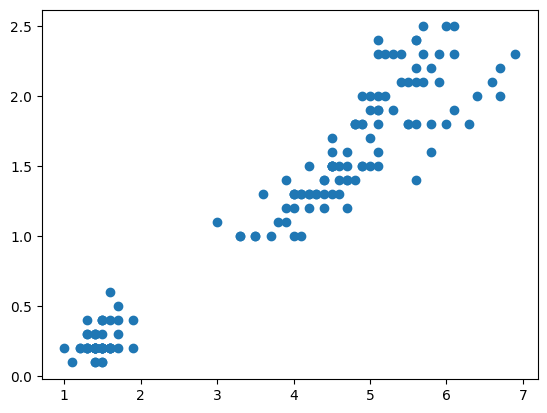

In [74]:
plt.scatter(df_new["petal length (cm)"],df_new["petal width (cm)"])

In [75]:
km=KMeans(n_clusters=2)
predicted=km.fit_predict(df[["petal length (cm)","petal width (cm)"]])
df_new["predicted"]=predicted

In [76]:
df_new

,petal length (cm),petal width (cm),predicted
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [77]:
df0=df_new[df_new["predicted"]==0]
df1=df_new[df_new["predicted"]==1]

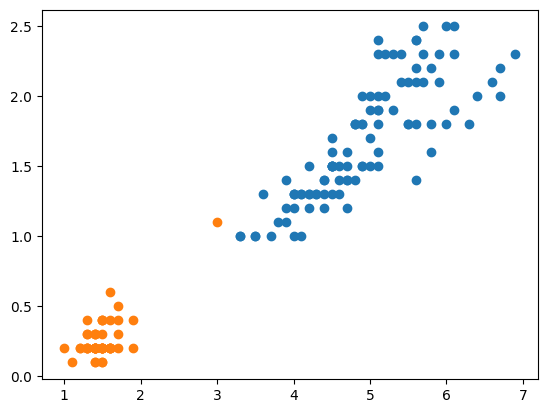

In [78]:
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"])
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"])
plt.scatter(df2["petal length (cm)"],df1["petal width (cm)"])


In [79]:
scaler=MinMaxScaler()
scaler.fit(df[["petal length (cm)"]])
df_new[["petal length (cm)"]]=scaler.transform(df_new[["petal length (cm)"]])
scaler.fit(df[["petal width (cm)"]])
df_new[["petal width (cm)"]]=scaler.transform(df_new[["petal width (cm)"]])

In [80]:
df_new

,petal length (cm),petal width (cm),predicted
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


In [87]:
km=KMeans(n_clusters=3)
predicted=km.fit_predict(df[["petal length (cm)","petal width (cm)"]])
df_new["predicted"]=predicted

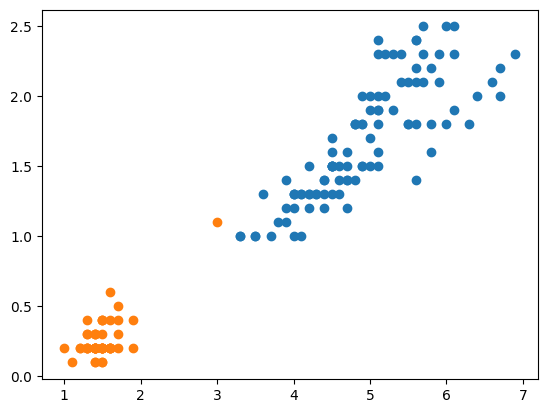

In [88]:
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"])
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"])
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"])


In [84]:
sse=[]
kval=range(1,9)
for k in kval:
    km=KMeans(k)
    km.fit(df[["petal length (cm)","petal width (cm)"]])
    sse.append(km.inertia_)

In [85]:
sse

[550.8953333333333,
 86.39021984551397,
 31.371358974358976,
 20.2996078034854,
 14.171085855554198,
 13.250711561512478,
 9.336660738803532,
 8.41113438195791]

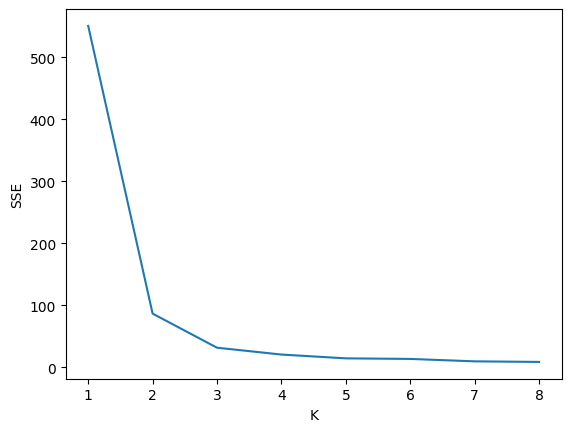

In [86]:
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(kval,sse)